# Data Analysis and Data Visualization of the Data set using Python

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
# importing OneHotEncoder
from sklearn.preprocessing import OneHotEncoder

Loading Data from CSV file as output of scraping process

In [2]:
home_df = pd.read_csv('home0_510.csv', usecols=['price','bedrooms','totalbedrooms','bathrooms','propertyType','BuildingType','storeys','communityName','title', 'landSize', 'Builtin' , 'parkingType', 'totalFinishedArea' , 'appliancesIncluded', 'foundationType','style', 'architectureStyle','basementType','po4','po3']).drop_duplicates()
home_df.head()

,price,bedrooms,totalbedrooms,bathrooms,propertyType,BuildingType,storeys,communityName,title,landSize,Builtin,parkingType,totalFinishedArea,appliancesIncluded,foundationType,style,architectureStyle,basementType,po4,po3
0,399900,3,3,3,Single Family,Row / Townhouse,2,Dartmouth,Freehold,under 1/2 acre,2010.0,Garage,1815.0,"Stove, Dishwasher, Washer, Microwave Range Hoo...",Poured Concrete,NaN,NaN,NaN,B2W0,B2W
1,329900,2,2,1,Single Family,Apartment,1,Dartmouth,Condominium/Strata,under 1/2 acre,2012.0,"Garage, Underground",986.0,Intercom,Poured Concrete,NaN,NaN,Full,B2W0,B2W
2,165000,3,4,2,Single Family,House,2,Kingston,Freehold,under 1/2 acre,1995.0,NaN,1400.0,"Stove, Dryer, Washer, Microwave, Microwave Ran...",Poured Concrete,Semi-detached,3 Level,Full (Partially finished),B0P1,B0P
3,339000,3,3,2,Single Family,House,2,Bedford,Freehold,under 1/2 acre,1980.0,NaN,1470.0,"Stove, Dishwasher, Dryer, Washer, Refrigerator",Poured Concrete,Semi-detached,NaN,NaN,B4A1,B4A
4,750000,3,4,3,Single Family,House,2,Robinsons Corner,Freehold,under 1/2 acre,2020.0,"Garage, Detached Garage",3120.0,"Cooktop - Electric, Oven, Dishwasher, Dryer, W...",Poured Concrete,Detached,NaN,NaN,B0J1,B0J


Extracting object features of Data set

In [3]:
# checking features
cat = home_df.select_dtypes(include='O').keys()
# display variabels
#cat.shape
home_df_obj =  home_df.select_dtypes(include='O')
display(home_df_obj.head())

,propertyType,BuildingType,communityName,title,landSize,parkingType,appliancesIncluded,foundationType,style,architectureStyle,basementType,po4,po3
0,Single Family,Row / Townhouse,Dartmouth,Freehold,under 1/2 acre,Garage,"Stove, Dishwasher, Washer, Microwave Range Hoo...",Poured Concrete,NaN,NaN,NaN,B2W0,B2W
1,Single Family,Apartment,Dartmouth,Condominium/Strata,under 1/2 acre,"Garage, Underground",Intercom,Poured Concrete,NaN,NaN,Full,B2W0,B2W
2,Single Family,House,Kingston,Freehold,under 1/2 acre,NaN,"Stove, Dryer, Washer, Microwave, Microwave Ran...",Poured Concrete,Semi-detached,3 Level,Full (Partially finished),B0P1,B0P
3,Single Family,House,Bedford,Freehold,under 1/2 acre,NaN,"Stove, Dishwasher, Dryer, Washer, Refrigerator",Poured Concrete,Semi-detached,NaN,NaN,B4A1,B4A
4,Single Family,House,Robinsons Corner,Freehold,under 1/2 acre,"Garage, Detached Garage","Cooktop - Electric, Oven, Dishwasher, Dryer, W...",Poured Concrete,Detached,NaN,NaN,B0J1,B0J


Extracting numeric features of Data set

In [4]:
home_df_numerics =  home_df.select_dtypes(include=['int', 'float'])
display(home_df_numerics.head())

,price,bedrooms,totalbedrooms,bathrooms,storeys,Builtin,totalFinishedArea
0,399900,3,3,3,2,2010.0,1815.0
1,329900,2,2,1,1,2012.0,986.0
2,165000,3,4,2,2,1995.0,1400.0
3,339000,3,3,2,2,1980.0,1470.0
4,750000,3,4,3,2,2020.0,3120.0


Information about Data set attributes

In [5]:
home_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 0 to 509
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   price               510 non-null    int64  
 1   bedrooms            510 non-null    int64  
 2   totalbedrooms       510 non-null    int64  
 3   bathrooms           510 non-null    int64  
 4   propertyType        510 non-null    object 
 5   BuildingType        509 non-null    object 
 6   storeys             510 non-null    int64  
 7   communityName       510 non-null    object 
 8   title               510 non-null    object 
 9   landSize            489 non-null    object 
 10  Builtin             404 non-null    float64
 11  parkingType         388 non-null    object 
 12  totalFinishedArea   509 non-null    float64
 13  appliancesIncluded  422 non-null    object 
 14  foundationType      479 non-null    object 
 15  style               448 non-null    object 
 16  architec

Data set description (Numeric attributes)

In [6]:
home_df.describe()

,price,bedrooms,totalbedrooms,bathrooms,storeys,Builtin,totalFinishedArea
count,5.100000e+02,510.000000,510.000000,510.000000,510.000000,404.000000,509.000000
mean,5.170100e+05,2.905882,3.347059,2.319608,1.543137,1983.967822,1970.322200
std,4.425132e+05,1.031415,1.112150,1.086535,0.554586,33.173451,933.624424
min,5.990000e+04,0.000000,1.000000,0.000000,1.000000,1835.000000,564.000000
25%,2.899250e+05,2.000000,3.000000,2.000000,1.000000,1972.000000,1344.000000
50%,4.000000e+05,3.000000,3.000000,2.000000,2.000000,1991.500000,1800.000000
75%,5.996750e+05,3.000000,4.000000,3.000000,2.000000,2008.000000,2400.000000
max,3.999900e+06,8.000000,9.000000,8.000000,3.000000,2022.000000,7317.000000


In [7]:
home_df.shape

(510, 20)

Using Pair Plot to compare attributes

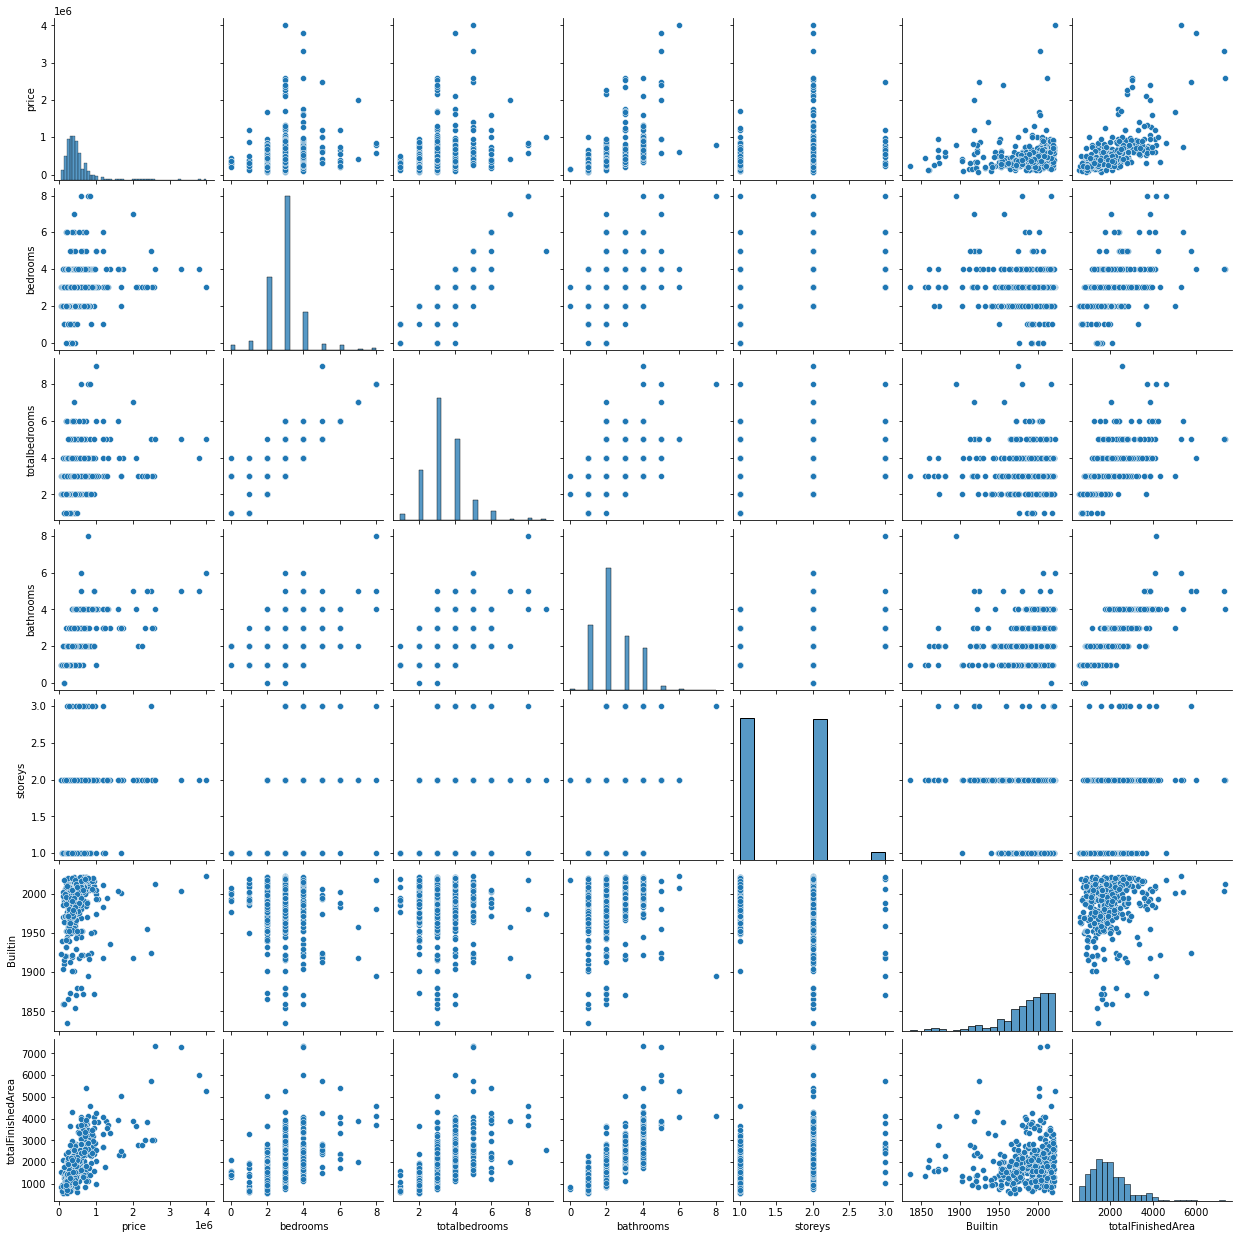

In [8]:
sns.pairplot(home_df)

Using Pair Plot to compare attributes with a hue attribute

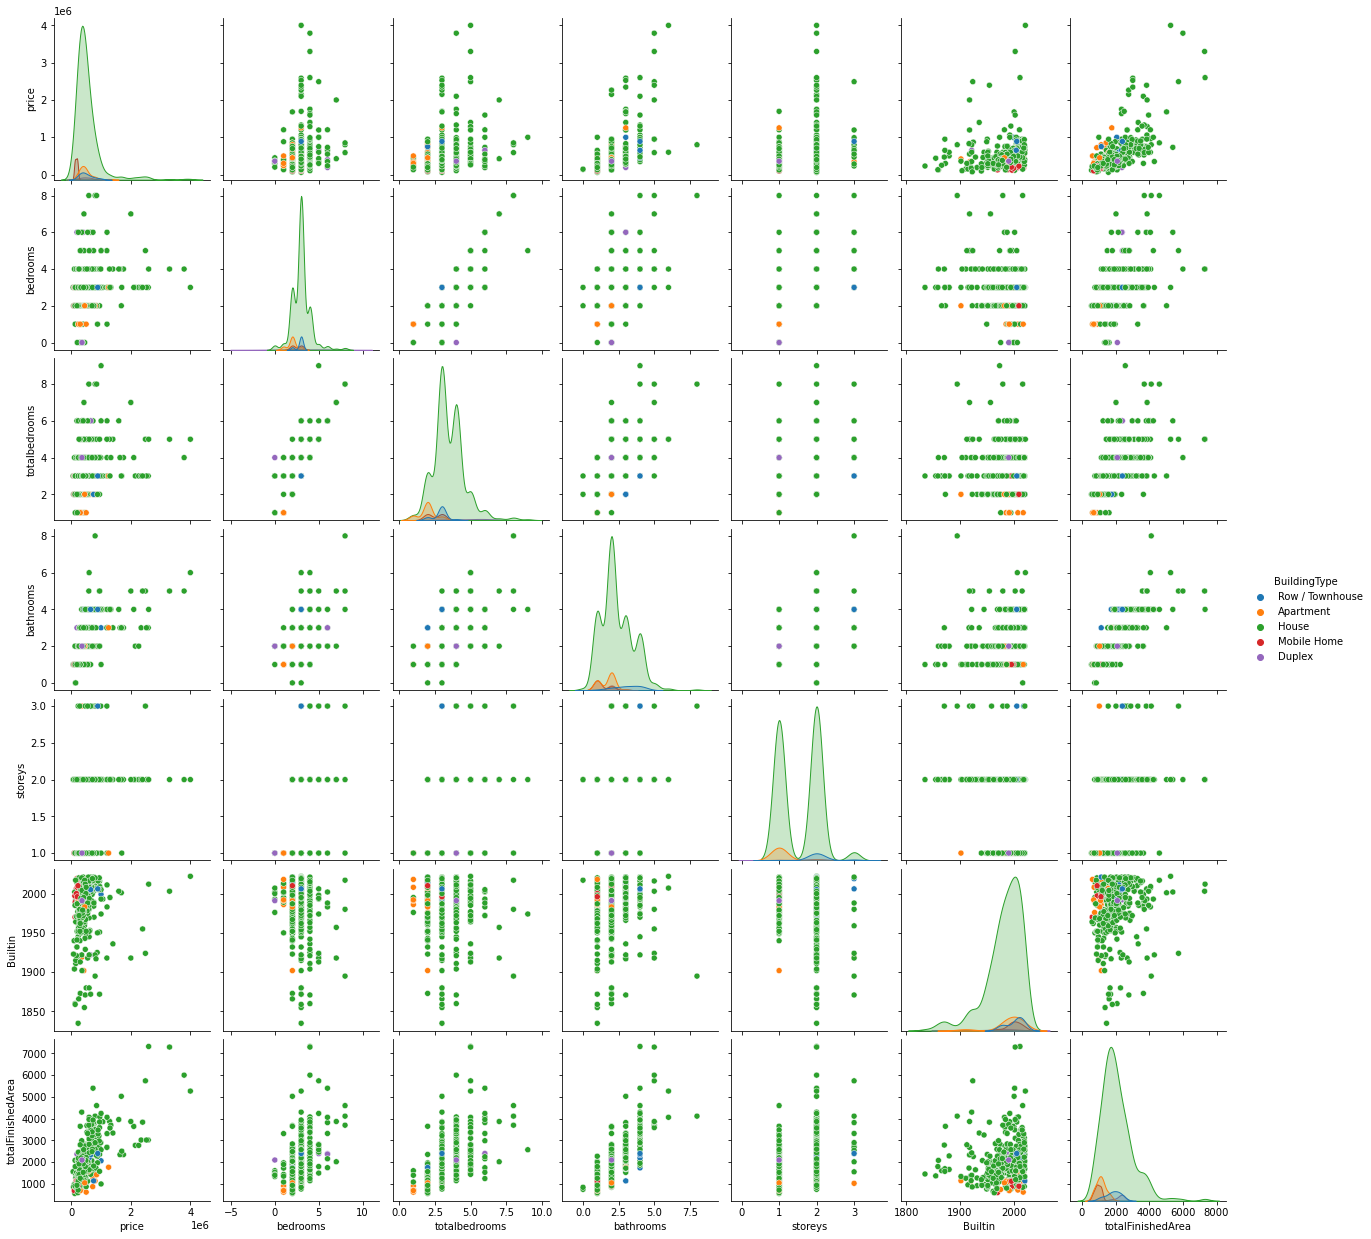

In [9]:
sns.pairplot(home_df , hue="BuildingType")

Distribution plot for variables

<AxesSubplot:xlabel='price', ylabel='Count'>

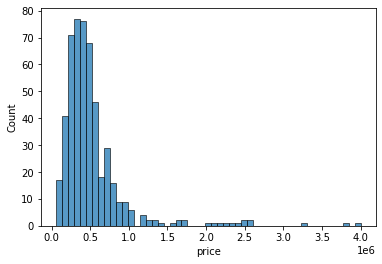

In [10]:
sns.histplot(home_df['price'])

<AxesSubplot:xlabel='bedrooms', ylabel='Count'>

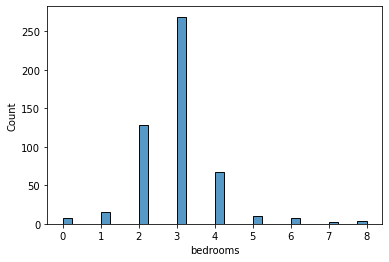

In [11]:
sns.histplot(home_df['bedrooms'])

<AxesSubplot:xlabel='bathrooms', ylabel='Count'>

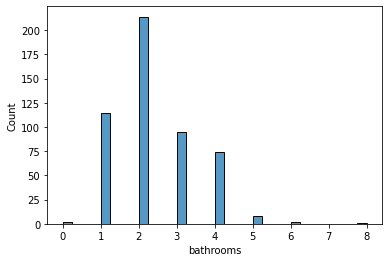

In [12]:
sns.histplot(home_df['bathrooms'])

<AxesSubplot:xlabel='totalbedrooms', ylabel='Count'>

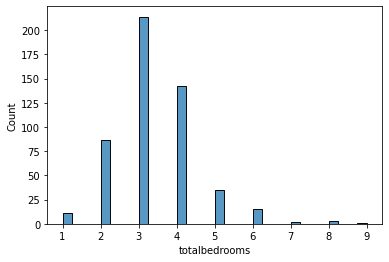

In [13]:
sns.histplot(home_df['totalbedrooms'])

<AxesSubplot:xlabel='storeys', ylabel='Count'>

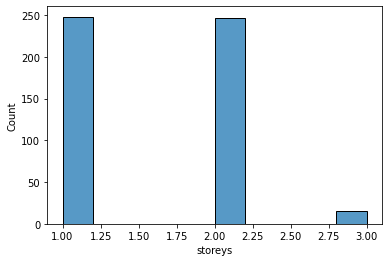

In [14]:
sns.histplot(home_df['storeys'])

<AxesSubplot:xlabel='totalFinishedArea', ylabel='Count'>

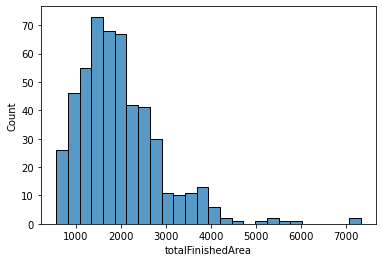

In [15]:
sns.histplot(home_df['totalFinishedArea'])

<AxesSubplot:xlabel='Builtin', ylabel='Count'>

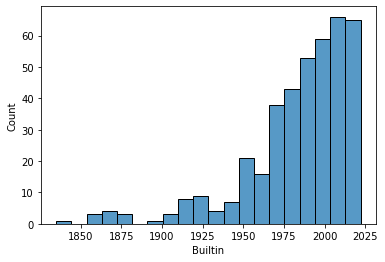

In [16]:
sns.histplot(home_df['Builtin'])

Heat Map chart to show the relation between attributes

<AxesSubplot:>

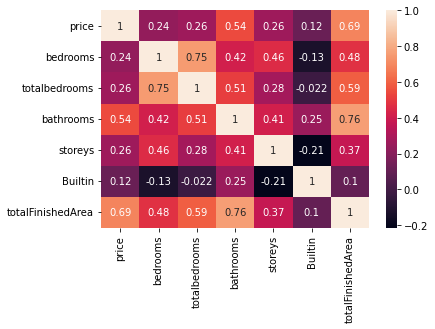

In [17]:
sns.heatmap(home_df.corr(), annot = True)